## Estimating Probabilities

### Introduction

Science and engineering have seen amazing progress over the last few centuries. We are now able to launch a spacecraft from Earth and predict it will arrive on Mars at a certain time and location. However, it looks like not everything is as easy to predict as the trajectory of a spacecraft.

Take tossing a coin, for instance — as ridiculous as it may sound, we're not able to predict with certainty whether the coin is going to land on heads or tails. And that's because a coin toss is a very complex phenomenon. The outcome depends on mutiple factors — the strength and the angle of the toss, the friction of the coin with air, the landing angle, the surface the coin lands on, etc.

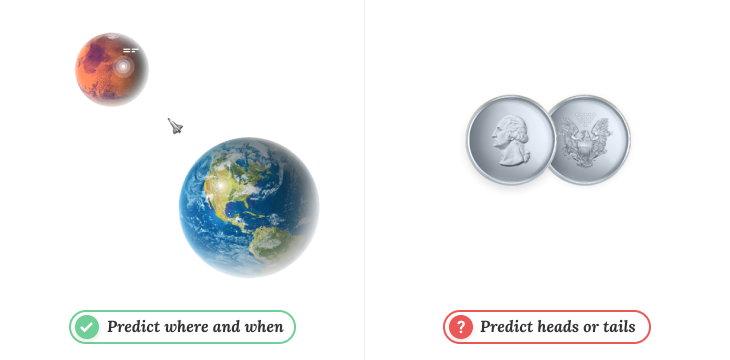

Although we can't tell beforehand the outcome of a coin toss, we'll learn in this course that we're able to at least estimate the probability (the chances) of a coin landing on heads or tails. This may sound like a limitation, and in a way it is, but estimating probabilities is an extremely powerful technique that can enable us to build non-trivial applications, including:

- Image recognition systems (used for self-driving cars, medical diagnosis, etc.)
- Spam filters for inboxes
- Statistical hypothesis tests

Throughout this course, we'll learn:

- How to estimate probabilities theoretically and empirically.
- What are the fundamental rules of probability.
- Counting techniques — tree diagrams, the rule of product, permutations, and combinations.

Let's start with estimating the probability of a coin landing heads up

## The Empirical Probability

In the previous screen, we talked about the difficulty of predicting the outcome of a coin toss. Whenever we can't predict outcomes with certainty, we're dealing with a random experiment.

The toss of a coin is a random experiment, just like drawing lottery numbers or rolling a die. The term "experiment" might make you think about science, but the term here has a wider meaning — a random experiment is any process for which we can't predict outcomes with certainty.

Although we can't predict the outcome of a random experiment, we can at least estimate the probability (the chances) associated with its outcomes. A coin toss has two possible outcomes, and we can estimate the probability associated with the coin landing on heads or tails.

Let's say we're interested in estimating the probability of a coin landing on heads. To estimate the probability, we can take the following steps:

- Toss the coin many times (thus repeating the random experiment).
- Count the number of times the coin landed on heads.
- Divide the number of heads by the total number of times we tossed the coin.

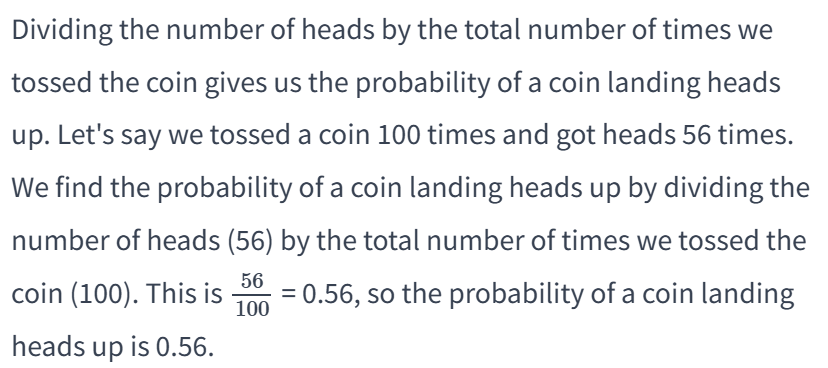

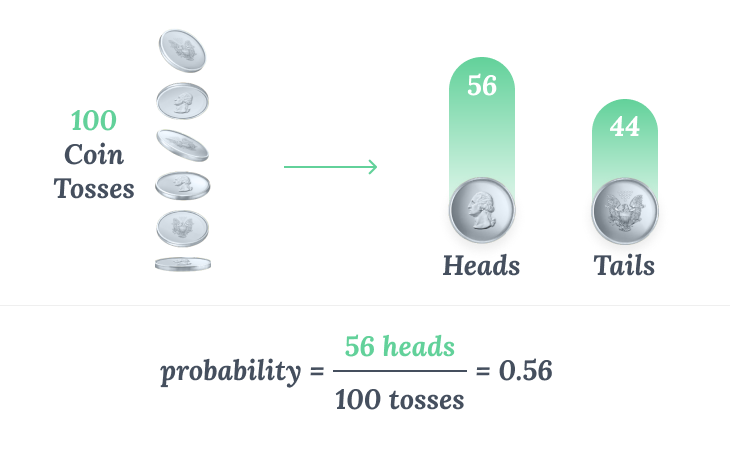

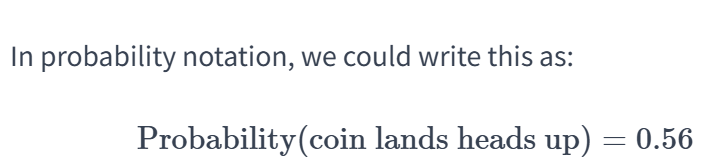

We read the mathematical expression above as "the probability of the event coin lands heads up is 0.56." For simplicity, the notation is often compressed, and "Probability" becomes "P", while "coin lands heads up" becomes simply "heads" or H:

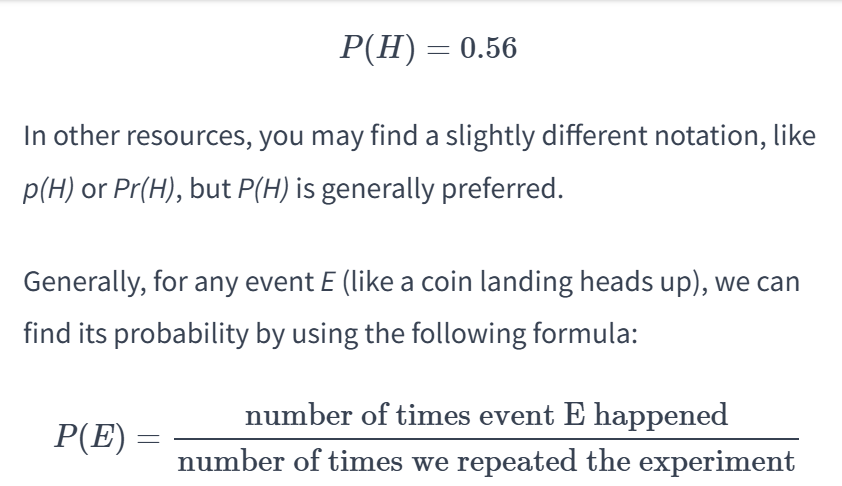

When we calculate the probability of an event by performing an experiment one or more times, we calculate the experimental — or empirical probability — of the event. Later in this lesson, we'll learn a different way of estimating probabilities, but for now let's stop for a few exercises and resume our discussion in the next screen.

1. Just like in our example above, we tossed a coin 100 times and got heads 56 times. Calculate the probability of getting tails using the formula above and assign the result to p_tail.
2. We rolled a regular six-sided die 200 times and:
We got a six 28 times. Calculate the probability of getting a 6 when rolling a six-sided die. Assign the result to p_six.
We got an odd number (a 1, a 3, or a 5) 102 times. Calculate the probability of getting an odd number when rolling a six-sided die. Assign the result to p_odd.
3. Print p_tail, p_six, and p_odd to examine the probabilities.

In [2]:
p_tail = 44 / 100

p_six = 28 / 200

p_odd = 102 / 200

print(p_tail)
print(p_six)
print(p_odd)

0.44
0.14
0.51


## Probability as Relative Frequency

In the example we used in the previous screen, we divided the number of heads by the number of times we tossed the coin to find the empirical probability of H (coin lands heads up):

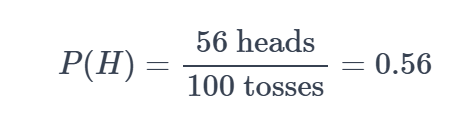

Notice, however, that 0.56 represents the proportion of heads from the total number of tosses. As we've learned in a previous lesson, we can convert proportions to percentages:

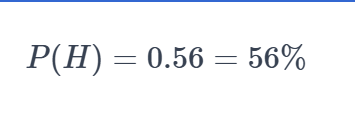

This tells us that the empirical probability of an event is nothing but the relative frequency (proportion or percentage) of that event with respect to the total number of times the experiment was performed.

Using percentages gives us a more intuitive understanding of what a probability value really is. For instance, P(H) = 56% tells us that for any coin toss, there's a 56% chance the coin will land heads up. So just before we're about to toss a coin, we may not be able to predict the outcome, but at least we know there's a 56% chance the coin will land heads up.

Let's do a few more exercises and resume the discussion on the next screen.

1. We tossed a coin 300 times and got tails 162 times.
    - Find the probability of getting heads. Assign your result to p_heads_1.
    - Transform the probability in p_heads_1 to a percentage value. Assign the result to percentage_1.

2. In a different trial, we tossed a coin 5,000 times and got tails 2,450 times.
    - Find the probability of getting heads. Assign your result to p_heads_2.
    - Transform the probability in p_heads_2 to a percentage value. Assign the result to percentage_2.

In [3]:
p_heads_1 = (300 - 162) / 300

percentage_1 = p_heads_1 * 100

p_heads_2 = (5000 - 2450) / 5000

percentage_2 = p_heads_2 * 100

## Repeating an Experiment

In the previous exercise, we tossed a coin 300 times, and found that P(H) = 46%. Then, we tossed a coin 5,000 times and found that P(H) = 51%. But if different number of tosses give different probability values, then what's the true value of P(H)?

To answer this question, we're going to do a thought experiment where we assume we already know that the true probability of P(H) is 50%. We'll also assume the chances are the same for getting tails, so P(T) = 50% (P(T) is an abbreviation for P(Tails)).

Using these assumptions, we're going to use Python to simulate a coin toss 10,000 times and watch how P(H) evolves as the number of tosses increases. We begin by writing a function named coin_toss() that can simulate a single coin toss:

In [19]:
from numpy.random import seed, randint
seed(1)
def coin_toss():
    if randint(0, 2) == 1:
        return 'HEAD'
    return 'TAIL'

coin_toss()

'HEAD'

In the code above:

- We used the [seed() function](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html) to set a random seed for reproducibility (we covered reproducibility and random seeds in a previous lesson).
- We used the [randint(0, 2) function](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) to generate randomly either a 0 or a 1 (2 won't be included). Because randint() generates numbers randomly, there's a 50% chance to get a 0 and 50% chance to get a 1 — this helps us introduce in our code a logic for P(H) = 50% and P(T) = 50%.
- If randint(0, 2) returns 1, our coin_toss() function returns 'HEAD', otherwise it returns 'TAIL'.

Now let's repeat the experiment 10,000 times in the exercise below. On the next screen, we'll analyze the results using a line plot and see how P(H) evolves as the number of tosses increases. Remember that the point of this experiment is to help us understand the true value of P(H).

In [23]:
# INITIAL CODE
from numpy.random import seed, randint

seed(1)

def coin_toss():
    if randint(0,2) == 1:
        return 'HEAD'
    else:
        return 'TAIL'
    
probabilities = []
heads = 0

for n in range(1, 10001):
    outcome = coin_toss()
    if outcome == 'HEAD':
        heads += 1
    current_probability = heads / n
    probabilities.append(current_probability)


probabilities[:10]

[1.0,
 1.0,
 0.6666666666666666,
 0.5,
 0.6,
 0.6666666666666666,
 0.7142857142857143,
 0.75,
 0.7777777777777778,
 0.7]

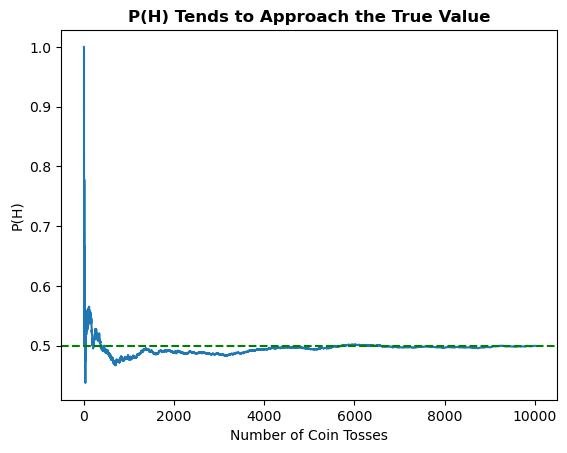

In [35]:
import matplotlib.pyplot as plt

plt.plot(list(range(1, 10001)), probabilities)
plt.axhline(0.5, linestyle='dashed', color='Green')
plt.xlabel('Number of Coin Tosses')
plt.ylabel('P(H)')
plt.title('P(H) Tends to Approach the True Value', weight='bold')
# plt.legend()
plt.show()

## The True Probability Value

In the previous exercise, we repeated a coin toss 10,000 times, and saved the results at the end of each toss. Using the probabilities we stored in the probabilities list, we created the line plot below, which shows the evolution of P(H) as the number of coin tosses increases.

Above, we see that for the first 1,000 tosses or so, the value of P(H) varies a lot, with a maximum of 1.0 and a minimum of approximately 0.45. However, as the number of tosses increases, the value of P(H) tends to stabilize.

Interestingly enough, P(H) stabilizes around the true value of P(H), which we assumed to be P(H) = 50% = 0.50 on the last screen. This suggests that the greater the number of coin tosses, the closer P(H) gets to the true value. If we take a look at the last few probabilities and round them all to two decimal places, we can see the values are all 0.50 (the values below are not yet rounded to two decimal places):

In [36]:
probabilities[-5:]

[0.4992997198879552,
 0.49934980494148246,
 0.4993998799759952,
 0.49934993499349933,
 0.4994]

This gives us some insight into our initial question, which was: if different numbers of tosses give different probability values, then what's the true value of P(H)? The true P(H) is given by the relative frequency (expressed as proportion or percentage) of heads as the number of coin tosses increases without bound — the more we repeat the toss, the closer we should be to the true probability.

Generally, the probability of an event (a coin landing heads up, getting a 5 when we roll a die, etc.) approaches the true probability value as the number of trials of the random experiment (a coin toss, the rolling of a die, etc.) increases without bound.

So far, we've only focused on empirical probabilities. On the next screen, we'll look at a different technique to estimate probabilities — a technique you might be more familiar with. For the next exercise, we're going to leave aside the coin toss experiment and consider a more practical example.

An insurance company conducted a study with 200 individuals, and found that:

- 87 individuals opted for at least a life insurance policy.
- 40 individuals opted for at least life and car insurance policies.
- 63 individuals opted for at least a house insurance policy.
- 160 individuals opted for at least one type of insurance policy.
We can't predict people's choices with certainty, so an individual choosing to buy an insurance policy is a random experiment. 200 individuals were part of the study, so you can consider the random experiment was performed 200 times. Find:

1. P(L): The probability that a new customer opts for at least a life insurance. Assign your answer to a variable named p_l.
2. P(L and C): The probability that an individual opts for at least a life and a car insurance policy. Assign your answer to a variable named p_l_and_c.
3. P(H): The probability that an individual opts for at least a house insurance policy. Assign your answer to a variable named p_h.
4. P(NO): The probability that an individual opts for no insurance at all. Assign your answer to a variable named p_no.

In [37]:
p_l = 87 / 200

p_l_and_c = 40 / 200

p_h = 63 / 200

p_no = (200 - 160) / 200

## The Theoretical Probability

So far, we learned we need to perform an experiment to estimate probability values. We also said that a probability value estimated by performing an experiment is called empirical (or experimental) probability. To find the empirical probability of any event E (like a coin landing heads up), we learned to use the formula:



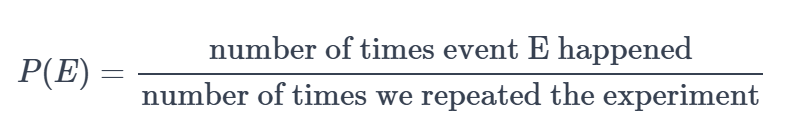

However, properly calculating empirical probabilities requires us to perform a random experiment many times, which may not always be feasible in practice. An easier way to estimate probabilities is to start with the assumption that the outcomes of a random experiment have equal chances of occurring. This allows us to use the following formula to calculate the probability of an event E:

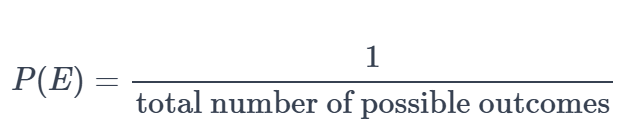

For instance, the total number of possible outcomes for a coin toss is two: heads or tails. Let H be the event that a coin lands on heads, and T the event that a coin lands on tails. We can use the formula above to find P(H) and P(T):

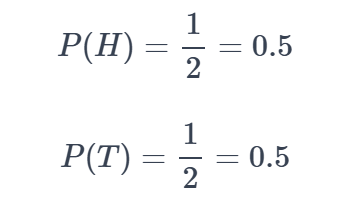

Let's also consider the rolling of a die, where there are six possible outcomes: 1, 2, 3, 4, 5 or 6. Assuming each outcome has the same chance of occurring, the probability of getting a 2 or a 4 is:

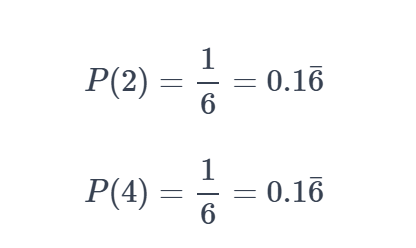

When we calculate the probability of an event under the assumption that the outcomes have equal chances of occurring, we say that we're calculating the theoretical probability of an event.

Theoretical probabilities are much easier to calculate, but in practice it doesn't always make sense to assume the outcomes of a random experiment have equal chances of occurring. If you were playing the lottery, it wouldn't be reasonable to assume that the two possible outcomes (you win or you don't) have equal chances.

If you were a scientist trying to calculate the probability of a human becoming infected with the HIV virus, it wouldn't be reasonable to assume the two possible outcomes (becoming infected with HIV or not) have equal chances of occurring. Both theoretical and empirical probabilities are helpful and important in practice.

On the next two screens, we'll discuss some important exceptions to the new formula we introduced above. First, let's practice calculating theoretical probabilities. For the exercises below, assume that all outcomes have equal chances of occurring.

1. Find the theoretical probability of getting a 5 when rolling a six-sided die. Assign your answer to p_5.
2. Tossing a coin twice has four possible outcomes (assume all the outcomes are equally likely):
    - Heads on the first toss and heads on the second toss (HH).
    - Heads on the first toss and tails on the second (HT).
    - Tails on the first toss and heads on the second (TH).
    - Tails on the first toss and tails on the second (TT).
3. Find:
    - P(HT): Assign your result to p_ht.
    - P(TT): Assign your result to p_tt.

In [40]:
p_5 = 1/6

p_ht = 1/4
p_tt = 1/4

## Events vs. Outcomes

So far, we've repeatedly used the terms "event" and "outcome," and we need to add a few clarifications. An outcome is any result that a random experiment may terminate in. For instance, all the possible outcomes of rolling a six-sided die are 1, 2, 3, 4, 5, and 6. An event, however, has a richer meaning and can include more than one outcome (or even zero outcomes):

- The event that we'll get an odd number when we roll a six-sided die — this event includes the outcomes 1, 3, and 5.
- The event that we'll get a number less than 5 but greater than 1 when we roll a six-sided die — this event includes the outcomes 2, 3, and 4.
- The event that we'll get a number greater than 20 when we roll a six-sided die — this event doesn't include any of the possible outcomes corresponding to rolling a six-sided die.

Although an event can include a single outcome (like the event of getting a 2 when we roll a die), the two concepts still have a different meaning. We always assign probabilities to events, not outcomes, even if the event includes only one outcome.

On the previous screen, we learned we can use this formula to compute the theoretical probability of an event:

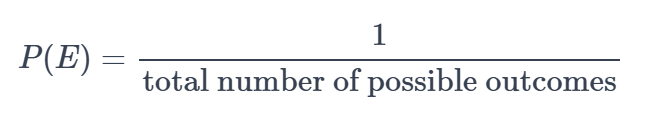

However, we can't use this formula to compute theoretical probabilities for events that include more than one outcome. Take the event that we'll get any number between 1 and 6 (both included) when rolling a six-sided die. The outcomes are 1, 2, 3, 4, 5, and 6, so there are 100% chances we'll get some number between 1 and 6. Using our formula, however, we find the probability is only 
16.
¯
6
%
:

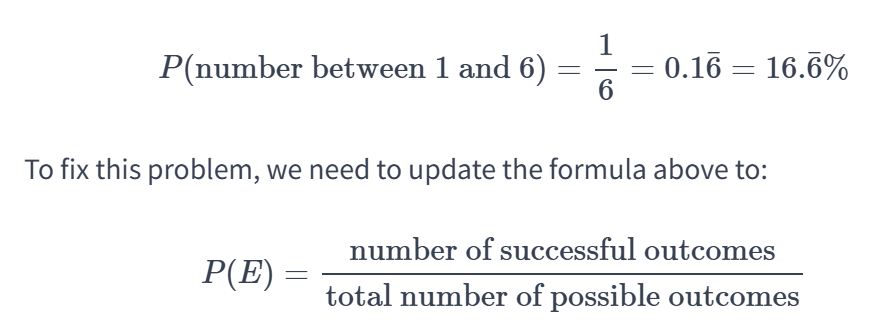

The "number of successful outcomes" part represents the number of outcomes included in the event E, and "total number of possible outcomes" is the number of possible outcomes that the random experiment associated with the event E could terminate in.

The event that we'll get an odd number when we roll a six-sided die includes three successful outcomes (1, 3, and 5), and the random experiment of rolling the die includes six possible outcomes (1, 2, 3, 4, 5, and 6). This means:

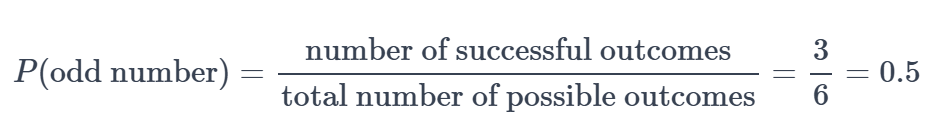

Using the updated formula, we also find that the probability of getting a number between 1 and 6 when we roll a die is 100%, just like we'd intuitively expect:



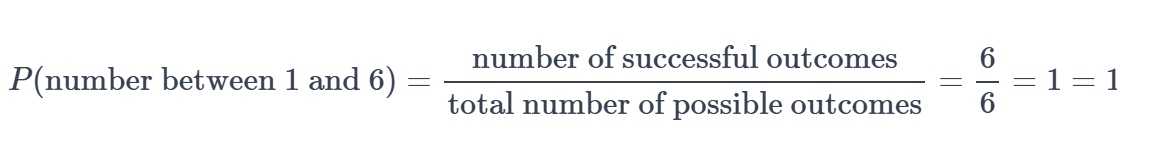

On the next screen, we'll discuss more about the formula we just learned. Let's now do a few exercises.

1. Assume all the outcomes of rolling a six-sided die have an equal chance of occuring. Calculate as proportion the probability of the following events:
    - We get an even number — assign your answer to p_even.
    - We get an odd number different than 3 — assign your answer to p_odd_no_3.
    - We get an odd number greater than 5 — assign your answer to p_odd_greater_5.

In [41]:
p_even = 3 / 6

p_odd_no_3 = 2/ 6

p_odd_greater_5 = 0 / 6

## A Biased Die

On the last screen, we came to the conclusion that we can use this formula to compute theoretical probabilities:

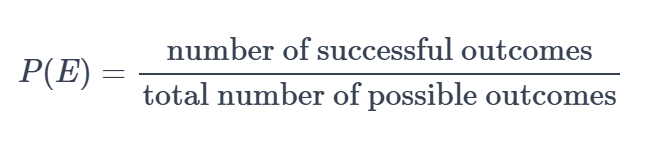

However, let's say we have a biased six-sided die which has a 6 on three of its sides, and 1, 3, and 5 on the rest of the sides.

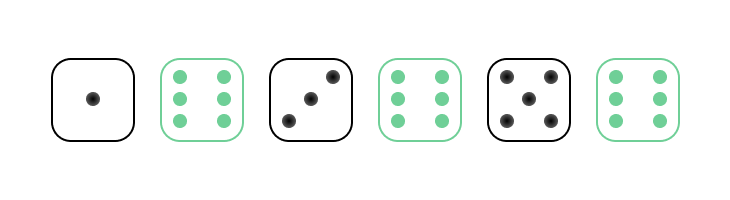


To be able to use the formula above, we need to take into account that 6 shows up on three sides. To do that, we treat each 6 as a different outcome and say that for this biased die the possible outcomes are 1, 3, 5, 6, 6 and 6.

Since we treat each 6 as a different outcome, the event "getting a 6" has three successful outcomes: 6, 6 and 6. This means that the probability of getting a 6 is:

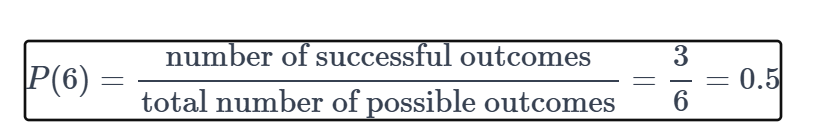

The event "getting a 3" has only one successful outcome, and the event "getting a 2" has no successful outcome, which leads to:

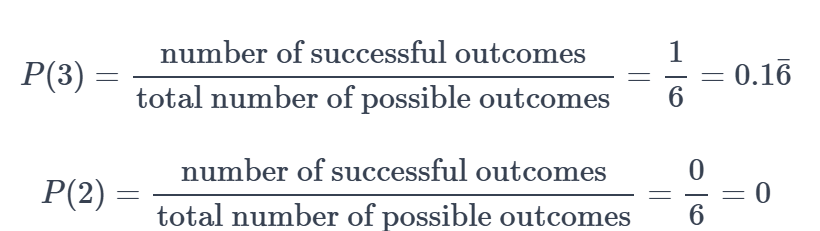

If we didn't treat each 6 differently and said it doesn't matter which side a 6 is on, we'd be forced to conclude the only possible outcomes are 1, 3, 5 and 6. We can definitely frame the problem like that, but the formula above won't work anymore — we see below P(6) becomes the same as P(3), but, intuitively, P(6) should be higher than P(3) since the die has 6 on three of its sides:

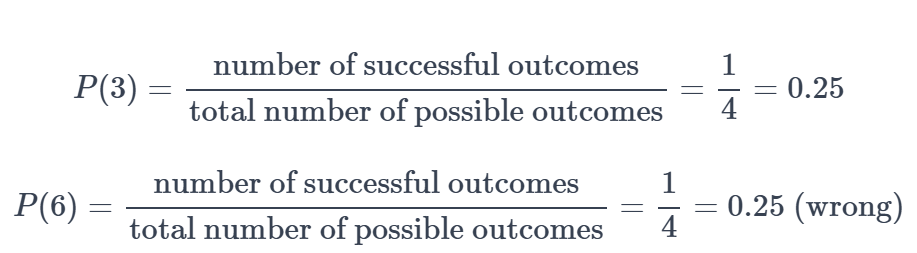

The formula doesn't work anymore because the assumption of equally likely outcomes is violated — in this case, 6 has more chances of occurring than the other outcomes.

The take-home message here is that the formula above works under the assumption that the outcomes have equal chances of occuring. If the assumption is violated, the formula will output wrong probability values. Let's consider a similar case in the exercise below.

1. In a jar of 100 marbles, 90 marbles are red and 10 are blue. Find as a proportion:
    - The probability of randomly selecting a blue marble from the jar — assign your answer to p_blue.
    - The probability of randomly selecting a red marble from the jar — assign your answer to p_red.

In [42]:
 p_blue = 10 / 100

p_red = 90 / 100

We created a set of extra practice problems for this lesson, and you can find them at this link. Practice problems are optional and won't affect your progress if you skip them.


In this first lesson on probability, we learned:

- How to calculate empirical probabilities.
- How to calculate theoretical probabilities.
- The difference between events and outcomes.
In the next lesson, we'll learn more probability concepts that will give us a much better understanding of the probability theory.

At this stage in our probability course, we focus more on simple examples (like a coin toss or rolling a die) to help you understand the concepts more easily. However, as soon as we advance, we'll start using real data sets and introduce realistic examples. We'll also use the concepts taught here to build hypothesis tests and machine learning models later on.

## Random Experiments

This practice problem set contains exercises for the Estimating Probabilities lesson, which is part of the Probability: Fundamentals course. We recommend that you complete the associated lesson before attempting these practice problems.

This lesson is optional and won't affect your progress if you skip it — you can still complete the Probability: Fundamentals course if you don't complete the practice problems lessons.

Practice problems give you an opportunity to further retain and recall what you learned in the lesson. They'll also help you make connections between facts, which is better than just knowing the facts in isolation.

We're going to start with a few exercises about theory, then we'll continue with solving probability problems.

1. Using probability, we can predict the outcome of any random experiment with 100% certainty. Assign the boolean True or False to sentence_1.
2. We can encounter random experiments only in science. Assign the boolean True or False to sentence_2.
3. Although we can't predict the outcome of a random experiment, we can at least try to estimate the probability associated with its outcomes. Assign the boolean True or False to sentence_3.

In [43]:
sentence_1 = False
sentence_2 = False
sentence_3 = True

## Theoretical and Empirical Probabilities

On the previous screen, we answered a few questions about random experiments. We'll continue with practice problems about empirical and theoretical probabilities.

Generally, for any event E (like a coin landing heads up), we can find its empirical probability by using the following formula:

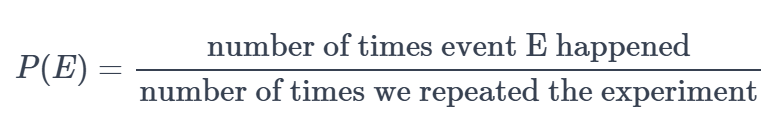

Generally, for any event E, we can find its theoretical probability by using the following formula:

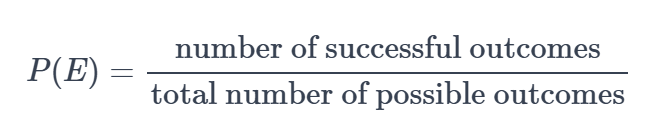

Let's implement these two formulas using Python code.

We defined two functions in the code editor: empirical_probability() theoretical_probability().

1. Compare the functions with the formulas we learned and correct the functions if necessary. For answer checking purposes, don't change the name of the functions.

2. An experiment was performed 550 times and the event of interest occurred 10 times. Use empirical_probability() to calculate the empirical probability of this event.

    - Assign your answer to emp_probability.
3. An experiment has 16 possible outcomes. The number of successful outcomes for an event of interest is 4. Assume all outcomes have the same chance of occurring and calculate the theoretical probability of this event using theoretical_probability().

    - Assign your answer to th_probability.

In [44]:
# INITIAL CODE
def empirical_probability(x, n_experiments):
    return x /n_experiments

def theoretical_probability(y, n_outcomes):
    return y/n_outcomes


In [45]:
 empirical_probability(10, 550)

0.01818181818181818

In [46]:
theoretical_probability(4, 16)

0.25

## Probabilities, Events, and Outcomes

On the previous screen, we wrote the empirical and theoretical probability formulas using Python functions.

Next, we're going to look at some theoretical questions about empirical probability, theoretical probability, outcomes, and events.

Evaluate the truth value of the following sentences.

1. In principle, the empirical probability of an event can be the same as its theoretical probability. Assign the boolean True or False to sentence_1.
2. For a coin toss, assume the chances are equal for both outcomes (heads and tails). If we repeat the coin toss 500 times, it's impossible that the coin will land heads 500 times. Assign True or False to sentence_2.
3. A fair coin (a fair coin means both heads and tails have the same chances of occurring) is tossed four times. The outcome "HHHH" (four heads in a row) has the same probability as the outcome "HTHT" (heads on the first toss, then tails, heads, and tails again). Assign True or False to sentence_3.
4. An event can correspond to zero outcomes. Assign True or False to sentence_4.
5. We assign probabilities to events, not outcomes. Assign True or False to sentence_5.

In [47]:
sentence_1 = True
sentence_2 = False
sentence_3 = True
sentence_4 = True
sentence_5 = True

## Calculating Probabilities

On the previous three screens, we focused more on theory. From this screen forward, we're going to solve probability problems.

Consider rolling a fair six-sided die (a fair die means all six outcomes have the same chance of occurring) and the following three events associated with this random experiment:

- Event A: we get an even number.
- Event B: we get either an odd or an even number greater than 4.
- Event C: we get an even number greater than 6.

In [49]:
all_outcomes = [1, 2, 3, 4, 5, 6]

A = [2, 4, 6]
B = [5, 6]
C = []

In [50]:
p_A = 3 / 6
p_B = 2 / 6
p_C = 0 / 6

## Simulating A Die Roll

Recall that we learned about empirical probability and created a function that simulates a coin toss:

In [61]:
from numpy.random import seed, randint

seed(1)

def coin_toss():
    if randint(0, 2) == 1:
        return 'HEAD'
    else:
        return 'TAIL'

coin_toss()

'HEAD'

In the code above:

- We used the [seed() function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html) to set a random seed for reproducibility (we covered reproducibility and random seeds in a previous lesson).
- We used the [randint(0, 2) function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html) to generate randomly either a 0 or a 1 (2 won't be included). Because randint() generates numbers randomly, there's a 50% chance to get a 0 and 50% chance to get a 1 — this helps us introduce in our code a logic for P(H) = 50% and P(T) = 50%.
- If randint(0, 2) returns 1, our coin_toss() function returns 'HEAD', otherwise it returns 'TAIL'.

For the next exercise, we'll create a function that simulates a die roll.

In [68]:
seed(1)
def die_roll():
    return randint(1, 7)

die_roll()

6

In [71]:
outcomes = []

for i in range(1000):
    outcomes.append(die_roll())

outcomes[:10]

[2, 2, 1, 5, 6, 5, 6, 1, 5, 1]

In [76]:
p_6 = len([val for val in outcomes if val == 6]) / 1000
p_1 = len([val for val in outcomes if val == 1]) / 1000
p_even = len([val for val in outcomes if val % 2 == 0]) / 1000
p_6, p_1, p_even

(0.173, 0.178, 0.505)

##  Lottery Probabilities

On the previous screen, we wrote a Python function that simulates the roll of a fair six-sided die, and then we calculated a few empirical probabilities. On this screen, we're going to solve probability problems about lotteries.

One type of lottery is 6/49: six numbers are drawn at random from a set of 49 numbers in the interval [1, 2, 3, ..., 47, 48, 49].

For instance, the outcome of one draw can be (12, 20, 25, 26, 30, 40) — if your ticket has these six numbers exactly, then you win the big prize.

But (12, 20, 25, 26, 30, 40) is just one of the many outcomes. Other outcomes include:

- (4, 29, 38, 40, 43, 49)
- (18, 22, 24, 39, 45, 47)
- (1, 9, 30, 32, 39, 42)

In total, there are 13,983,816 different outcomes. Using this information, let's try to answer a few probability problems.

1. Assign the total number of different outcomes for a 6/49 lottery to a variable named total_n_outcomes.

In [77]:
total_n_outcomes = 13983816


2. Calculate the theoretical probability of winning the big prize (you win the big prize if one of your tickets matches exactly all six of the numbers drawn) by playing:

- A single ticket — assign your answer to p_1.
- Two different tickets — assign your answer to p_2.
- 100 different tickets — assign your answer to p_100.
- 6,991,908 different tickets — assign your answer to p_half.
- 13,983,816 different tickets — assign your answer to p_all

In [83]:
from itertools import combinations
len(list(combinations(range(1,50), 6)))

13983816

In [85]:
p_1 = 1 / total_n_outcomes
p_2 = 2/total_n_outcomes
p_100 = 100 / total_n_outcomes
p_half = 6991908 / total_n_outcomes
p_all = total_n_outcomes / total_n_outcomes

## Probability Rules

In the last lesson, we learned how to calculate empirical and theoretical probabilities, and introduced a few key concepts: random experiment, outcomes, and events. In this lesson, we'll build on this knowledge to learn new techniques.

Remember that a random experiment is any process for which we can't predict outcomes with certainty. An outcome is a possible result of a random experiment, while an event can include more than one outcome.

In probability theory, the outcomes of a random experiment are usually represented as a set. For example, this is how we can represent the outcomes of a die roll as a set:

Outcomes =
{
1
,
2
,
3
,
4
,
5
,
6
}

A set is a collection of distinct objects, which means each outcome must occur only once in a set:

- {Heads, Tails} is an example of a valid set because all the elements are distinct.
- {Heads, Heads} is not a proper set because two elements are identical.

Notice we also use curly braces to write a set: {Heads, Tails} is a set, while [Heads, Tails] is not a set.

In probability theory, the set of all possible outcomes is called a sample space. A sample space is often denoted by the capital Greek letter Ω (read "omega"). This is how we represent the sample space of a die roll:

Ω =
{
1
,
2
,
3
,
4
,
5
,
6
}

Let's now do a quick exercise and continue the discussion in the next screen.


We toss a normal coin two times. Find the sample space of this experiment and assign it to the list coin_toss_omega.

- One of the outcomes is heads first, tails second. Abbreviate heads as H, tails as T, and assign the string 'HT' (heads first, tails second) to the list coin_toss_omega. Repeat this pattern for the other outcomes.

In [86]:
coin_toss_omega = {'HT', 'TH', 'TT', 'HH'}

## Probability of Events

On the last screen, we learned that a sample space is a set containing all the possible outcomes of a random experiment and saw that the sample space of a die roll is:

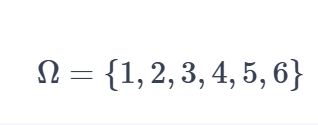

Consider the event "getting an even number when rolling a die," which we abbreviate by the letter "E". Event E corresponds to three of the outcomes we see above in the sample space Ω: 2, 4, and 6. We can also represent event E as a set:

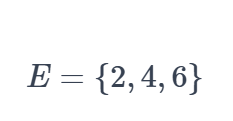

In the previous lesson, we said we assign the probability to events, not outcomes. For our event E, we have:

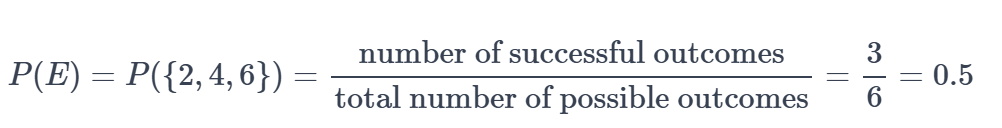

For the following exercise, we'll consider a random experiment where we roll a fair six-sided die two times ("fair" means all outcomes have equal chances of occurring). The sample space of this experiment has 36 possible outcomes (all the sequences of numbers we can get from the two throws):

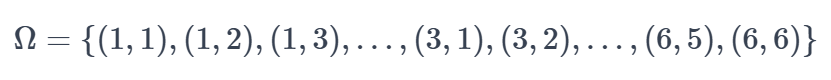

For each outcome, we sum up the two numbers and get the following sums:



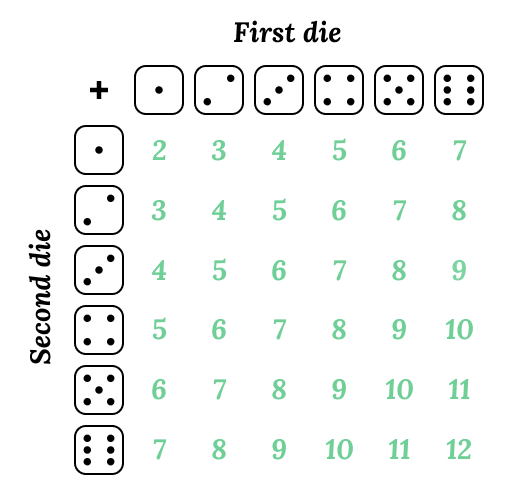


Let's now find the probability for a few events.

Use the table above to find the probability of the following events:

1. The sum of the two rolls is 6. Assign the probability to p_sum_6.
2. The sum of the two rolls is lower than 15. Assign the probability to p_lower_15.
3. The sum of the two rolls is greater than 13. Assign the probability to p_greater_13.

In [87]:
p_sum_6 = 5 / 36
p_lower_15 = 36 / 36
p_greater_13 = 0 / 36

## Certain and Impossible Events

For the last exercise, we considered rolling a fair six-sided die two times. Below, we again see the table with the sums we'd get if we added the numbers of the two rolls together.

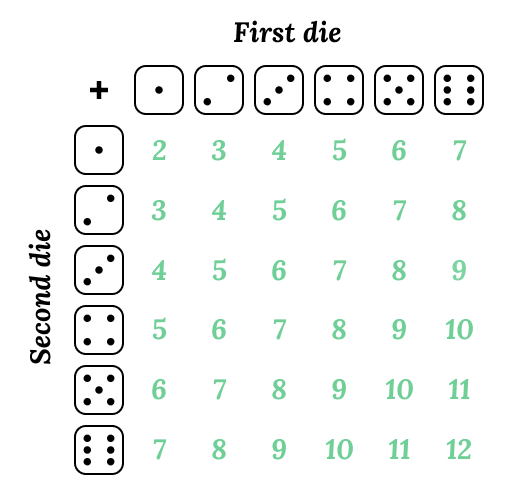

The sample space of this experiment has 36 possible outcomes — all the sequences of numbers we can get from the two throws (notice we don't consider the actual sums part of the sample space):

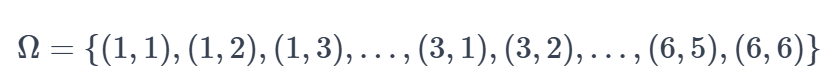

One event we considered was getting a sum greater than 13 (we'll denote this event by "A"). In the table above, we see no dice combination results in a sum greater than 12, which means event A is impossible and has no corresponding outcome in the sample space. Thus, event A corresponds to an empty set, which we denote by the symbol Ø:

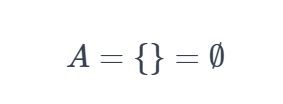

The probability of A, which is an impossible event, is 0:

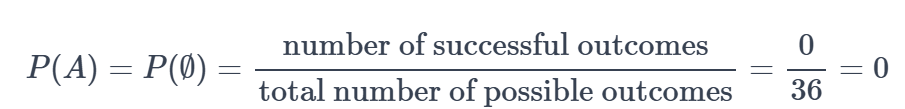

The other event we considered in the last exercise was getting a sum lower than 15 (we'll denote this event by "B"). In the table above, we see all dice combinations result in a sum that is 12 or lower, which means event B is certain to happen and contains all the elements of the sample space Ω:

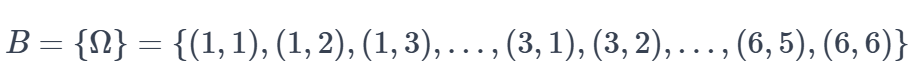

The probability of B, which is a certain event, is 1:

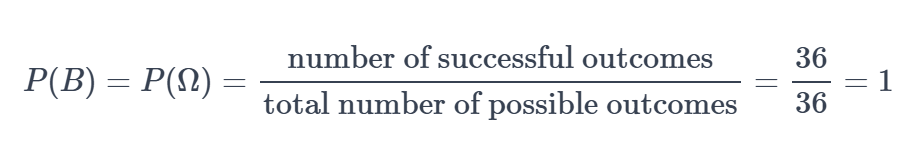

From our discussion in this screen, we can conclude:

The probability of an impossible event is 0:

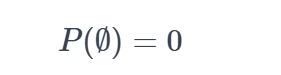

The probability of a certain event is 1:

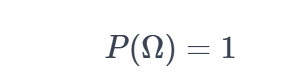

The probability of any event ranges between 0 and 1:

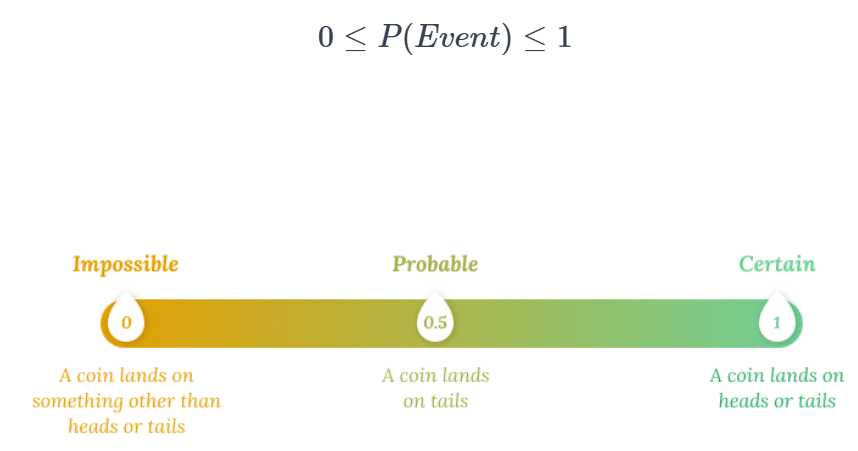

These are three important probability rules that we'll need to always keep in mind when we're solving probability problems. Let's now focus on another exercise and continue the discussion on the next screen.

Using the table above, find for the same experiment the probability of the following events:

1. The sum is either 2 or 4. Assign the probability as a proportion to p_2_or_4.
2. The sum is either 12 or 13. Assign the probability as a proportion to p_12_or_13.

In [88]:
p_2_or_4 = 4/36
p_12_or_13 = 1/36

## The Addition Rule

For rolling a fair six-sided die ("fair" means all outcomes have equal chances of occurring), consider the following two events, A and B:

- A = {3} — getting a 3
- B = {5} — getting a 5

Now, we'd like to find:

- P(A) — the probability of getting a 3
- P(B) — the probability of getting a 5
- P(A or B) — the probability of getting a 3 or a 5

The sample space of rolling a fair six-sided die is:

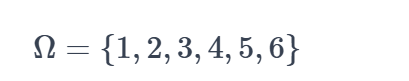

The sample space tells us that there are six total possible outcomes. With that in mind, we can use what we learned to find that:

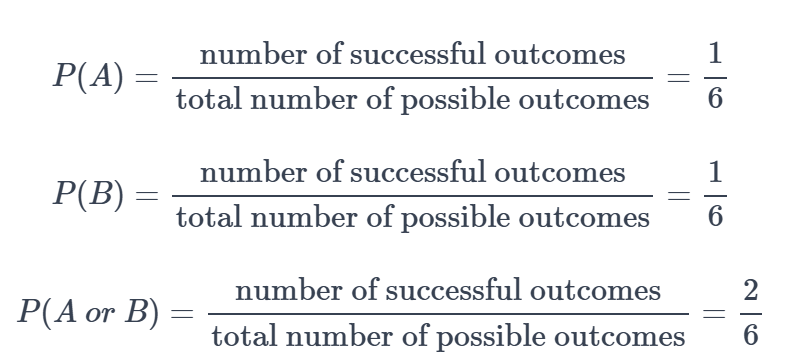

To calculate P(A or B), we can also use the formula below, which is sometimes called the addition rule:

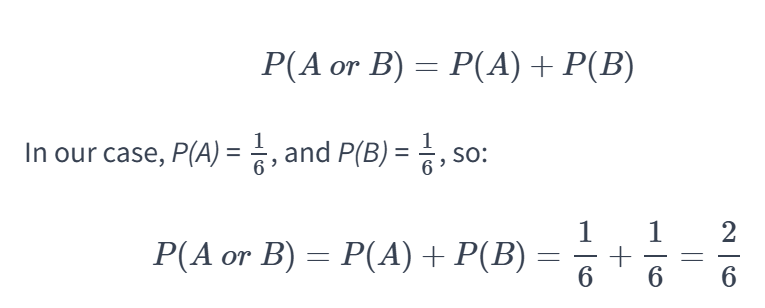

The addition rule can be extended to more than two events:

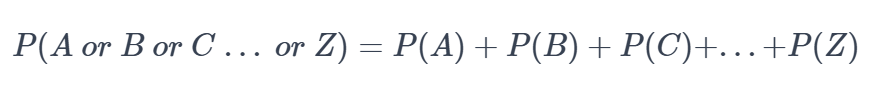

Let's do a few exercises and return to the addition rule in the next screen, where we'll discuss some exceptions. We'll need the table below again, which shows the sums we'd get if we added the numbers of two individual die rolls.

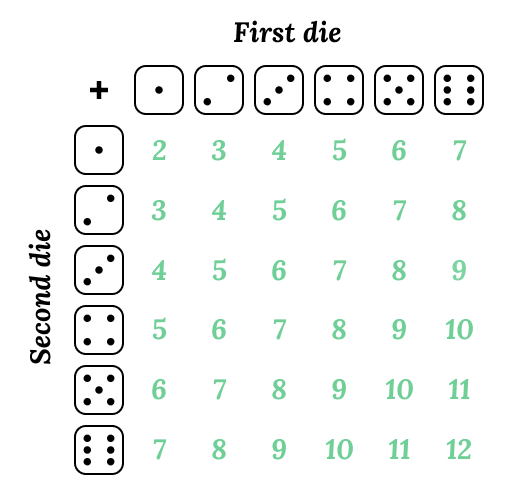


Using the addition rule, find the probability of the following events:

- The sum is either 5 or 9 — assign your answer to p_5_or_9.
- The sum is either even or less than 2 — assign your answer to p_even_or_less_2.
- The sum is either 4 or a multiple of 3 — assign your answer to p_4_or_3_multiple. Check the hint if you don't remember what a multiple is.

In [89]:
p_5_or_9 = 4/36 + 4 /36
p_even_or_less_2 = 18/ 36 + 0/36
p_4_or_3_multiple =  3/36 + 12 /36

## Venn Diagrams

On the last screen, we considered rolling a fair six-sided die, and found the probability of the following two events:

- A = {3} — getting a 3
- B = {5} — getting a 5

In probability, we can visualize events using Venn diagrams. For instance, this is how we can represent event A on a Venn diagram:

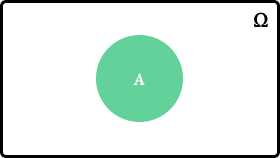

Notice we represented A as a green circle inside a rectangle. The rectangle describes the entire sample space — note the Ω sign on the right corner of the rectangle.

We can also add events A and B on the same Venn diagram:

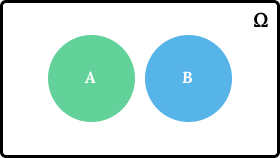

Consider also the events C and D, which are:

- C = {2, 4, 6} — getting an even number
- D = {4, 5, 6} — getting a number greater than 3

Notice that two elements, 4 and 6, belong to both C and D. To account for these two common elements, we need to represent C and D on a Venn diagram with a point of intersection:

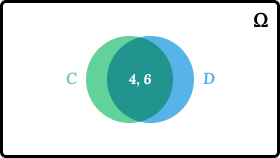

For the exercises below, we're going to calculate the probability for:

- Event C
- Event D
- Event "C or D"

Assume all outcomes have equal chances of occurring.

1. Make sure you've read the instructions above and calculate (notice that for this exercise we're considering a single die, not the sum of two dice):

    - P(C) — assign your answer to p_c.
    - P(D) — assign your answer to p_d.
2. The event "getting a number that is either even or greater than 3" corresponds to the event "C or D". Calculate:

    - P(C or D) using the addition rule — assign your answer to p_c_d_addition. Check the hint if you're not sure about the outcomes corresponding to the event "C or D".
    - P(C or D) using the formula we've been using to compute theoretical probabilities (the number of successful outcomes divided by the number of possible outcomes) — assign your answer to p_c_d_formula.
3. Print p_c_d_addition and p_c_d_formula. Why do you think we see different results (we'll explain this on the next screen)?

In [91]:
p_c = 3/6
p_d = 3/6

p_c_d_addition = p_c + p_d
p_c_d_formula =  4 / 6

## Exceptions to the Addition Rule

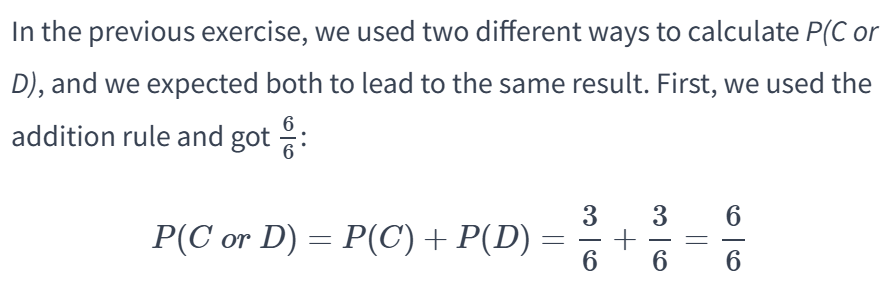

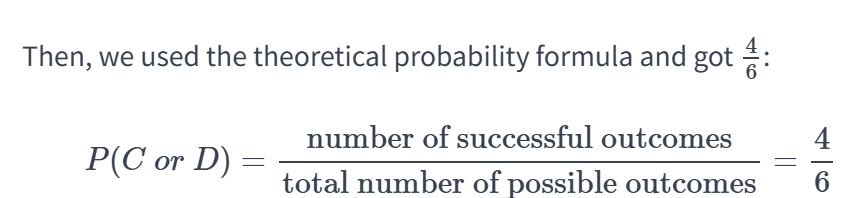

The reason we got different results is that the addition rule doesn't work for events that share corresponding outcomes. In the case of C and D, they have two outcomes in common: 4 and 6 (remember event C is getting an even number and event D is getting a number greater than 3).

To understand why the addition rule doesn't work, let's visualize events C and D on a Venn diagram again. This time, however, we're going to assume the colored areas represent probability values:

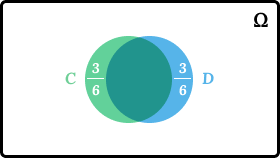

When we do P(C) + P(D), notice we add up the intersection point (the shaded area) twice:

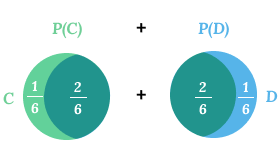

To solve the problem, we need to subtract the probability of the shaded area such that we add it only once:

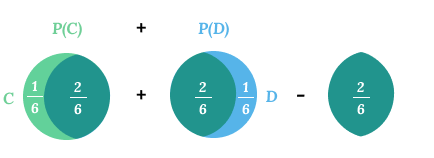

The shaded area is the point where C and D intersect, which means it's the event where both C and D happen. This corresponds to the event "getting a number that is both even and greater than 3," which has the probability:

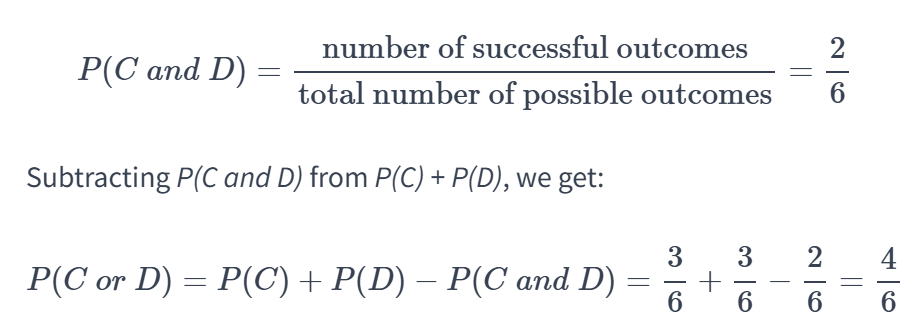

This is the same result we got from using the theoretical probability formula:

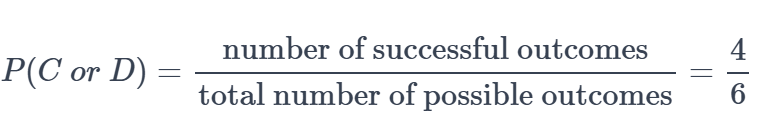

Let's do a quick exercise and discuss more about this on the next screen.

- An online betting company offers customers the possibility of betting on a variety of games and events (football, tennis, hockey, horse races, car races, etc.). Based on historical data, the company knows the empirical probabilities of the following events:
    - Event F (a new customer's first bet is on football) — the probability is 0.26.
    - Event T (a new customer's first bet is on tennis) — the probability is 0.11.
    - Event "T and F" (a new customer's first bet is on both football and tennis) — the probability is 0.03.

Find the probability that a new customer's first bet is either on football or tennis. Assign your answer to p_f_or_t. You can't use theoretical probability formula to solve this, so you'll need to make use of the addition rule.

In [95]:
p_f_or_t = .11  + .26  - 0.03
p_f_or_t


0.33999999999999997

## Mutually Exclusive Events

On the last screen, we saw on our Venn diagrams we have two types of events:

- Events that don't intersect at all (like A and B).
- Events that have an area where they intersect (like C and D).

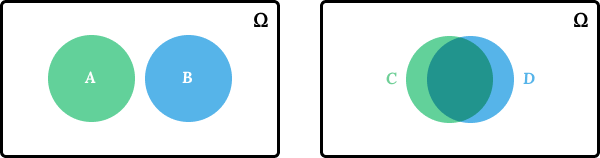

Events that don't intersect are called mutually exclusive — events A and B are mutually exclusive. If two events are mutually exclusive, it means they can't happen both at the same time — if one of the events happens, the other cannot possibly happen and vice-versa. Examples of mutually exclusive events include:

- Getting a 5 (event one) and getting a 3 (event two) when we roll a regular six-sided die — it's impossible to get both a 5 and 3.
- A coin lands on heads (event one) and tails (event two) — it's impossible for a coin to land on both heads and tails.

Events that intersect are called mutually non-exclusive — events C and D on the Venn diagram above are mutually non-exclusive. Mutually non-exclusive events can happen at the same time, and examples include:

- Getting a number greater than 2 (event one) and getting an odd number (event two) when we roll a regular six-sided die — we could get a 5, which is both greater than 2 (event one) and odd (event two).- 
A customer buys a red shirt (event one) and a blue shirt (event two) — the customer can buy both a red shirt (event one) and a blue shirt (event two).

For mutually non-exclusive events, we always need to use the formula below to make sure we don't include the area of intersection twice in our calculations (the area of intersection corresponds to the situation where both events happen):.

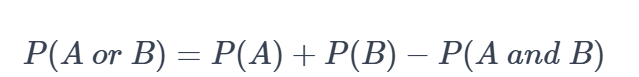

The formula above, however, works for both mutually non-exclusive and exclusive events. If two events — A and B — are mutually exclusive, then the event "A and B" is impossible (you can't get both heads and tails at the same time, for example). If event "A and B" is impossible, it means P(A and B) = 0, so:

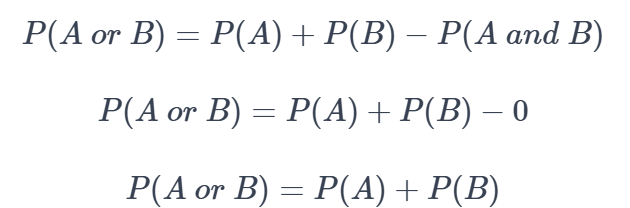

Let's now direct our attention to an exercise where we'll again consider the example with the betting company (please take a few seconds to recap the last exercise if you don't remember the example).

- Based on historical data, the company knows the empirical probabilities of the following events:
    - Event H (a new customer's first bet is on hockey) — the probability is 0.08.
    - Event C (a new customer's first bet is on car races) — the probability is 0.11.
    - Event "H or C" (a new customer's first bet is either on hockey or car races) — the probability is 0.17.
 
Find the probability that a new customer's first bet is on both hockey and car races. Assign your answer to p_h_and_c. Check the hint if you get stuck.

In [97]:
p_h_and_c = 0.08 + 0.11 - 0.17
p_h_and_c

0.01999999999999999

## Set Notation

Over the last two screens, we considered events like "A or B" and "A and B," and when we calculated probabilities, we wrote P(A or B) and P(A and B). Taken individually, event A and event B are sets containing a series of outcomes, and we need to introduce some notation around "or" and "and" when dealing with sets.

Consider the following sets:

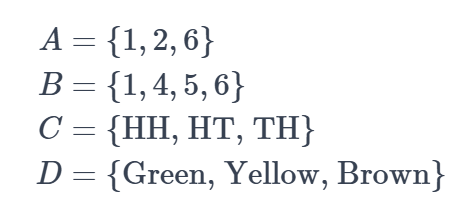

In set theory, when we say "set A or set B," we are referring to a single set that is the result of the union between set A and set B. The resulting set will have:

- The elements of set A that are not in B
- The elements of set B that are not in A
- The elements that occur in both A and B

A set can only contain unique elements, so the set resulting from a union cannot include the elements that occur in both A and B more than one time. Below, we see the result of a few unions between the four sets above (A, B, C, and D) — in set theory, we use the symbol 
∪
 to represent union:

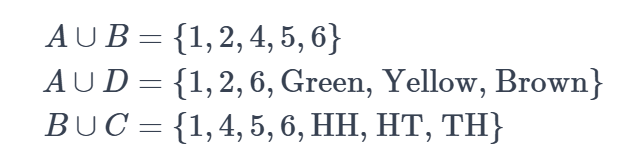

When we say "set A and set B," we are referring to a single set that contains all the unique elements that occur in both A and B. In set theory, this "and" operation is called intersection and is represented by the symbol 
∩
. Below, we see the results of the intersection of the various sets above (remember Ø means an empty set):

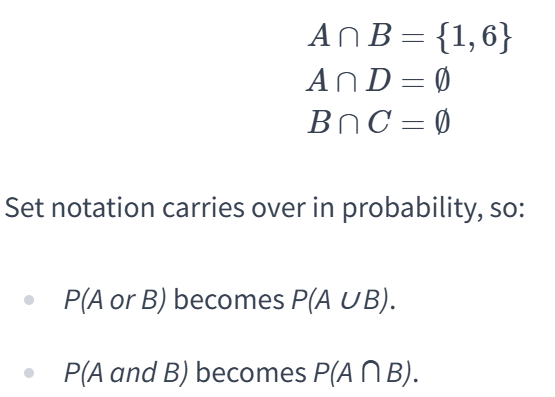

We can use set notation to rewrite the addition rule we already learned (this is the way you usually encounter the addition rule in many probability resources):

Moving forward, we're going to use set notation in our courses. Set notation is used pervasively in the probability literature — we chose to teach it so you don't feel lost when you consult other probability resources.

Now let's do a couple of exercises and wrap up this lesson in the next screen.

Consider the following sets:

- M = {100, 22, 1, 2}
- N = {22, car insurance, 2, house insurance}
- O = {HHHH, TTTT, TH}
- P = {Hockey, Cycling, Athletics, Swimming}

Consider the following set operations and their results:

- M ∪ P = Ø: If you think the result is correct, assign the boolean True to a variable named operation_1, otherwise assign False.
- N ∩ M = {22, 2}: If you think the result is correct, assign the boolean True to a variable named operation_2, otherwise assign False.
- O ∪ M = {HHHH, TTTT, 100, 22, 2}: If you think the result is correct, assign the boolean True to a variable named operation_3, otherwise assign False.
- P ∩ N = Ø: If you think the result is correct, assign the boolean True to a variable named operation_4, otherwise assign False.

In [98]:
operation_1 = False
operation_2 = True
operation_3 = False
operation_4 = True

In this lesson, we learned a few important things:

- The addition rule for mutually exclusive and non-exclusive events.
- How to represent events and sample space on Venn diagrams.
- How to use set notation in probability.

If you want to dig in more by yourself, we recommend checking the "Resources" section at the bottom of this lesson's takeaway.

In the next lesson, we'll build on the knowledge we've acquired and learn new techniques that will help us tackle questions we cannot yet answer:

1. What is the probability that it takes three flips or more for a coin to land heads up?
2. What is the probability of a coin landing heads up 18 times in a row?
3. What is the probability of getting at least one 6 in four throws of a single six-sided die?
4. What is the probability of getting at least one double-six in 24 throws of two six-sided dice?
5. What is the probability of getting four aces in a row when drawing cards from a standard 52-card deck?